## Preprocessing and Feature Engineering

### Importing Data Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from data_preprocessing import *

%matplotlib inline

/anaconda3/envs/dsi/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


- #### Importing Clean Train and Test Data

In [2]:
df_train = pd.read_csv('../data/clean_train.csv')

In [3]:
df_test = pd.read_csv('../data/clean_test.csv')

 - #### Converting Categorical features into ranks
     - get unique values for each feature and corresponding mean saleprice
     - sort by mean and scale means by max mean value 
     - ex. [5, 10, 15, 20, 25] max = 25
         - [(1/5), (2/5), (3/5), (4/5), 1]
     - assign fraction to corresponding unique value to fill in missing value 
     - Checking work

In [4]:
cat_features = df_train.select_dtypes(include = 'object').columns

columns_dict = {}

for category in cat_features:    
    
    sorted_means = df_train.groupby(category)['saleprice'].mean().sort_values()
    
    columns_dict[category] = {i:(sorted_means[i] / sorted_means.max()) for i in sorted_means.index}
        
    df_train[category] = df_train[category].map(columns_dict[category])
    df_test[category] = df_test[category].map(columns_dict[category])

In [5]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,0.590614,69.0,9142,1.0,0.655411,0.696399,0.68228,...,0,0,0,0.575687,1.0,0.728658,0,4,2006,0.626878
1,2718,905108090,90,0.874744,86.0,9662,1.0,1.000000,0.905511,0.68228,...,0,0,0,0.575687,1.0,0.728658,0,8,2006,0.626878
2,2414,528218130,60,0.874744,58.0,17104,1.0,1.000000,0.905511,0.68228,...,0,0,0,0.575687,1.0,0.728658,0,9,2006,1.000000
3,1989,902207150,30,0.590614,60.0,8520,1.0,1.000000,0.696399,0.68228,...,0,0,0,0.575687,1.0,0.728658,0,7,2007,0.626878
4,625,535105100,20,0.874744,24.0,9500,1.0,1.000000,0.905511,0.68228,...,0,185,0,0.575687,1.0,0.728658,0,7,2009,0.626878


In [6]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,0.874744,99.0,13517,1.0,1.0,0.905511,0.68228,...,0,0,0.575687,1.0,0.728658,0,3,2010,0.626878,130500
1,544,531379050,60,0.874744,43.0,11492,1.0,1.0,0.905511,0.68228,...,0,0,0.575687,1.0,0.728658,0,4,2009,0.626878,220000
2,153,535304180,20,0.874744,68.0,7922,1.0,1.0,0.696399,0.68228,...,0,0,0.575687,1.0,0.728658,0,1,2010,0.626878,109000
3,318,916386060,60,0.874744,73.0,9802,1.0,1.0,0.696399,0.68228,...,0,0,0.575687,1.0,0.728658,0,4,2010,0.626878,174000
4,255,906425045,50,0.874744,82.0,14235,1.0,1.0,0.905511,0.68228,...,0,0,0.575687,1.0,0.728658,0,3,2010,0.626878,138500


In [7]:
df_test.isnull().sum().max()

2

In [8]:
get_missing_values(df_test, suppress=False)

Number of features without missing values: 8


,features,num_missing_values
0,roof_matl,2
1,exterior_1st,1
2,exterior_2nd,2
3,mas_vnr_type,1
4,heating,1
5,electrical,1
6,kitchen_qual,1
7,sale_type,1


In [9]:
impute_missing_values(df_test, 'mean')

In [10]:
df_test.isnull().sum().max()

0

### Creating an Interaction
   
   - Adding total basement SF with 1st and 2nd floor SF to create a total square feet
     

In [11]:
df_test['total_sf'] = df_test['total_bsmt_sf'] + df_test['1st_flr_sf'] + df_test['2nd_flr_sf']

In [12]:
df_train['total_sf'] = df_train['total_bsmt_sf'] + df_train['1st_flr_sf'] + df_train['2nd_flr_sf']

## Examaning Correlations
- Adding all square feet of house to create a total SF
- Created a correlation heatmap to find the strongest correlations with price
- Only displaying positive correlations

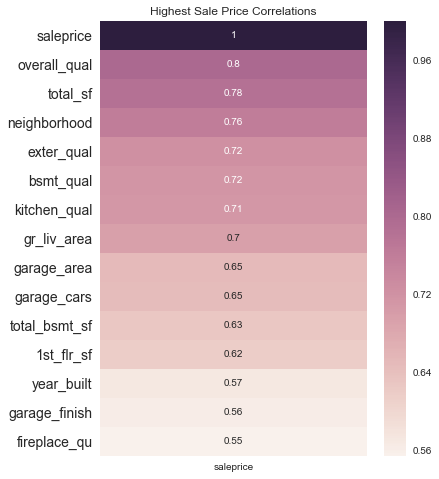

In [13]:
plt.figure(figsize=(6,8))
ax = sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice',ascending=False)[:15],annot=True)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.title('Highest Sale Price Correlations');

### Visualizations
- #### Using box plots and scatter plots to gain a better understanding of a few of the most highly correlated features

/anaconda3/envs/dsi/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


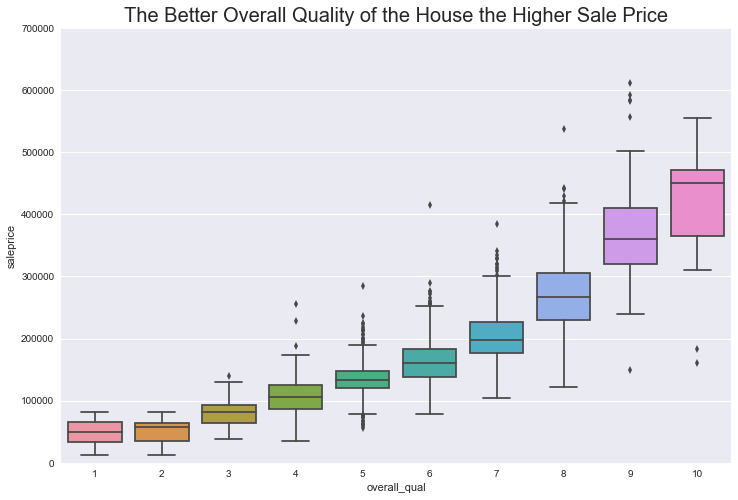

In [14]:
var = 'overall_qual'
data = pd.concat([df_train['saleprice'], df_train[var]], axis=1)
f, ax =plt.subplots(figsize=(12,8))
fig = sns.boxplot(x=var, y='saleprice', data=data)
plt.title('The Better Overall Quality of the House the Higher Sale Price', fontsize=20)
fig.axis(ymin=0, ymax=700000)
plt.show();

- #### Scatter Plot Correlations

Text(0, 0.5, 'Sale Price')

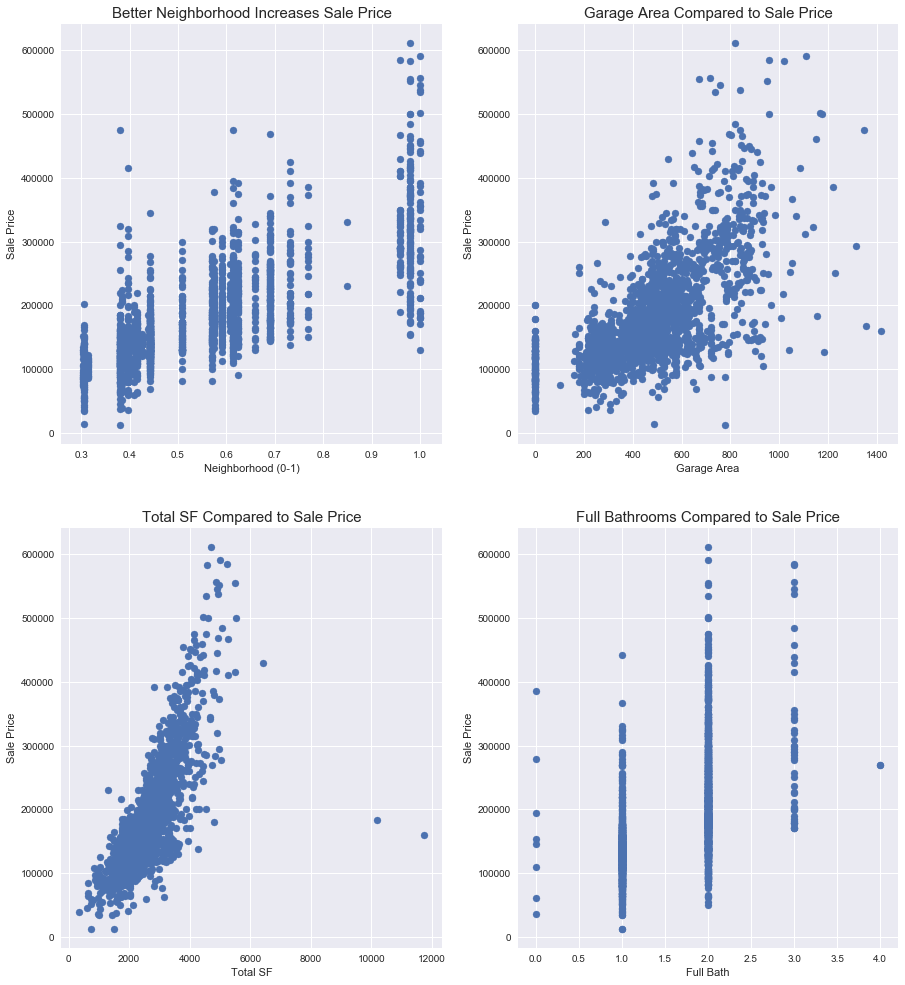

In [15]:
plt.figure(figsize = (15,17))

ax1 = plt.subplot(221)
ax1.set_title('Better Neighborhood Increases Sale Price', fontsize=15)
ax1.scatter(df_train['neighborhood'], df_train['saleprice'])
plt.xlabel('Neighborhood (0-1)')
plt.ylabel('Sale Price')


ax2 = plt.subplot(222)
ax2.set_title('Garage Area Compared to Sale Price', fontsize=15)
ax2.scatter(df_train['garage_area'], df_train['saleprice'])
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')


ax3 = plt.subplot(223)
ax3.set_title('Total SF Compared to Sale Price', fontsize=15)
ax3.scatter(df_train['total_sf'], df_train['saleprice'])
plt.xlabel('Total SF')
plt.ylabel('Sale Price')

ax4 = plt.subplot(224)
ax4.set_title('Full Bathrooms Compared to Sale Price', fontsize=15)
ax4.scatter(df_train['full_bath'], df_train['saleprice'])
plt.xlabel('Full Bath')
plt.ylabel('Sale Price')



 - Getting an in-depth look into a few features that seemed unique when related to sale price
     - Total SF has a nice positive correlation with sale price however has two huge outliers that skew the graph. This will be removed below.
     - Garage area has a more normal distribution when compared to price 
     - The better the neighborhood the higher sale price however does have a large range for each neighborhood ranking

In [16]:
df_train = df_train.drop(df_train[df_train['gr_liv_area']>4000].index, axis=0)

In [17]:
df_train.reset_index(drop='index',inplace=True)

### Displaying the list of features that will be used in the model 
- Used all features with correlations above 0.5 on sale price however stayed away from features that were highly correlated with each other so to not have multicollinearity.
- Did not use features dealing with years as it may skew the result.
    - Garage area and garage cars is an example because they supply redundant information and removing one will usually not drastically affect R2.

In [18]:
features = ['overall_qual', 'total_sf','neighborhood', 'exter_qual', 'bsmt_qual', 'kitchen_qual', 'gr_liv_area',
            'garage_cars', 'garage_finish','fireplace_qu', 'full_bath', 'foundation', 'garage_type','mas_vnr_area']
features

['overall_qual',
 'total_sf',
 'neighborhood',
 'exter_qual',
 'bsmt_qual',
 'kitchen_qual',
 'gr_liv_area',
 'garage_cars',
 'garage_finish',
 'fireplace_qu',
 'full_bath',
 'foundation',
 'garage_type',
 'mas_vnr_area']

## Saving Data

In [19]:
df_train.to_csv('../data/EDA_Preprocessing_train.csv', index=False)

In [20]:
df_test.to_csv('../data/EDA_Preprocessing_test.csv', index=False)